In [ ]:
!pip install eon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 4.4 MB/s 
  Created wheel for eon: filename=EoN-1.1-py3-none-any.whl size=120819 sha256=4681291dfee1c4f6da86c0fae6f2b50834b0e4fb8c77b67678b2c059c849bdeb
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built eon


generating graph G with 1000000 nodes
doing event-based simulation
doing Gillespie simulation
done with simulations, now plotting


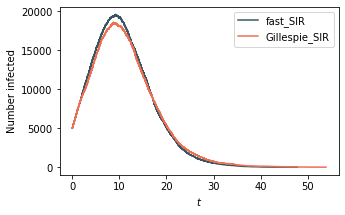

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
N = 10**6 #number of individuals
kave = 5 #expected number of partners
print('generating graph G with {} nodes'.format(N))
G = nx.fast_gnp_random_graph(N, kave/(N-1)) #Erdo’’s-Re’nyi graph
rho = 0.005 #initial fraction infected
tau = 0.3 #transmission rate
gamma = 1.0 #recovery rate
print('doing event-based simulation')
t1, S1, I1, R1 = EoN.fast_SIR(G, tau, gamma, rho=rho)
#instead of rho, we could specify a list of nodes as initial_infecteds, or
#specify neither and a single random node would be chosen as the index case.
print('doing Gillespie simulation')
t2, S2, I2, R2 = EoN.Gillespie_SIR(G, tau, gamma, rho=rho)
print('done with simulations, now plotting')
plt.plot(t1, I1, label = 'fast_SIR')
plt.plot(t2, I2, label = 'Gillespie_SIR')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

generating graph G with 100000 nodes
doing Event-driven simulation
doing Gillespie simulation
done with simulations, now plotting


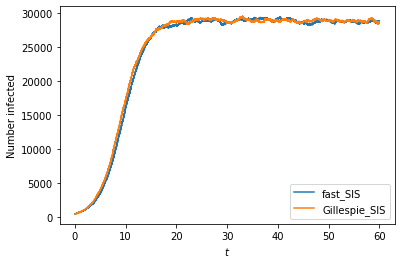

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
N = 10**5 #number of individuals
kave = 5 #expected number of partners
print('generating graph G with {} nodes'.format(N))
G = nx.fast_gnp_random_graph(N, kave/(N-1)) #Erdo’’s-Re’nyi graph
rho = 0.005 #initial fraction infected
tau = 0.3 #transmission rate
gamma = 1.0 #recovery rate
print('doing Event-driven simulation')
t1, S1, I1 = EoN.fast_SIS(G, tau, gamma, rho=rho, tmax = 30)
print('doing Gillespie simulation')
t2, S2, I2 = EoN.Gillespie_SIS(G, tau, gamma, rho=rho, tmax = 30)
print('done with simulations, now plotting')
plt.plot(t1, I1, label = 'fast_SIS')
plt.plot(t2, I2, label = 'Gillespie_SIS')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

generating graph G with 1000000 nodes
0
doing Event-driven simulation
1
doing Event-driven simulation
2
doing Event-driven simulation
3
doing Event-driven simulation
4
doing Event-driven simulation
5
doing Event-driven simulation
6
doing Event-driven simulation
7
doing Event-driven simulation
8
doing Event-driven simulation
9
doing Event-driven simulation
done with simulation, now plotting


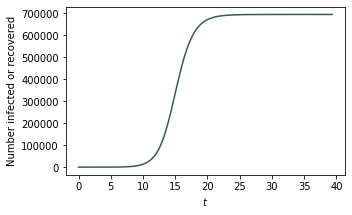

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np
def rec_time_fxn_gamma(u):
  return np.random.gamma(3,0.5) #gamma distributed random number
def trans_time_fxn(u, v, tau):
    if tau >0:
      return np.random.exponential(1./tau)
    else:
      return float('Inf')
N = 10**6 #number of individuals
kave = 5 #expected number of partners
print('generating graph G with {} nodes'.format(N))
G = nx.fast_gnp_random_graph(N, kave/(N-1)) #Erdo’’s-Re’nyi graph
tau = 0.3
for cntr in range(10):
  print(cntr)
  print('doing Event-driven simulation')
t, S, I, R = EoN.fast_nonMarkov_SIR(G, trans_time_fxn = trans_time_fxn,
rec_time_fxn = rec_time_fxn_gamma,
trans_time_args = (tau,))
#To reduce file size and make plotting faster, we’ll just plot 1000
#data points. It’s not really needed here, but this demonstrates
#one of the available tools in EoN.
subsampled_ts = np.linspace(t[0], t[-1], 1000)
subI, subR = EoN.subsample(subsampled_ts, t, I, R)
print('done with simulation, now plotting')
plt.plot(subsampled_ts, subI+subR)
plt.xlabel('$t$')
plt.ylabel('Number infected or recovered')
plt.show()


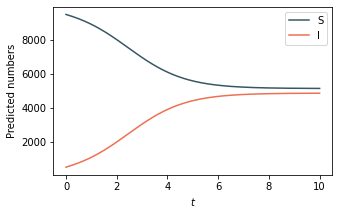

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
N=10000
gamma = 1
rho = 0.05
kave = 20
tau = 2*gamma/ kave
S0 = (1-rho)*N
I0 = rho*N
SI0 = (1-rho)*kave*rho*N
SS0 = (1-rho)*kave*(1-rho)*N
t, S, I = EoN.SIS_homogeneous_pairwise(S0, I0, SI0, SS0, kave, tau, gamma,
tmax=10)
plt.plot(t, S, label ='S')
plt.plot(t, I, label = 'I')
plt.xlabel('$t$')
plt.ylabel('Predicted numbers')
plt.legend()
plt.show()


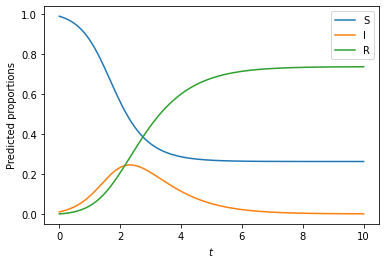

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np
gamma = 1
tau = 1.5
kave = 3
rho = 0.01
phiS0 = 1-rho
def psi(x):
  return (1-rho)* np.exp(-kave*(1-x))
def psiPrime(x):
  return (1-rho)*kave*np.exp(-kave*(1-x))
N=1
t, S, I, R = EoN.EBCM(N, psi, psiPrime, tau, gamma, phiS0, tmax = 10)
plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R, label = 'R')
plt.xlabel('$t$')
plt.ylabel('Predicted proportions')
plt.legend()
plt.show()


generating graph G with 100000 nodes
doing Gillespie simulation
done with simulation, now plotting


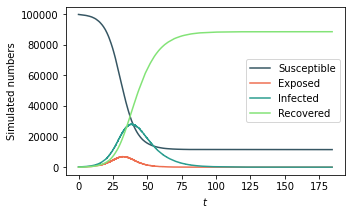

In [ ]:
import EoN
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import random
N = 100000
print('generating graph G with {} nodes'.format(N))
G = nx.fast_gnp_random_graph(N, 5./(N-1))
#We add random variation in the rate of leaving exposed class
#and in the partnership transmission rate.
#There is no variation in recovery rate.
node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}
nx.set_node_attributes(G, values=node_attribute_dict,
name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict,
name='transmission_weight')
#
#These individual and partnership attributes will be used to scale
#the transition rates. When we define \texttt{H} and \texttt{J}, we provide the name
#of these attributes.
#More advanced techniques to scale the transmission rates are shown in
#the online documentation
H = nx.DiGraph() #For the spontaneous transitions
H.add_node('S') #This line is actually unnecessary.
H.add_edge('E', 'I', rate = 0.6, weight_label='expose2infect_weight')
H.add_edge('I', 'R', rate = 0.1)
J = nx.DiGraph() #for the induced transitions
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.1,
weight_label='transmission_weight')
IC = defaultdict(lambda: 'S')
for node in range(200):
  IC[node] = 'I'
  return_statuses = ('S', 'E', 'I', 'R')
print('doing Gillespie simulation')
t, S, E, I, R = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses,
tmax = float('Inf'))
print('done with simulation, now plotting')
plt.plot(t, S, label = 'Susceptible')
plt.plot(t, E, label = 'Exposed')
plt.plot(t, I, label = 'Infected')
plt.plot(t, R, label = 'Recovered')
plt.xlabel('$t$')
plt.ylabel('Simulated numbers')
plt.legend()
plt.show()

Warning, book says \tau=2\gamma/<K>, but its really 1.5\gamma/<K>
Warning - for the power law graph the text says k_{max}=110, but I believe it is 118.


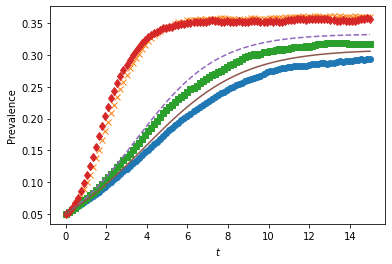

In [ ]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

print(r'Warning, book says \tau=2\gamma/<K>, but its really 1.5\gamma/<K>')

print(r'Warning - for the power law graph the text says k_{max}=110, but I believe it is 118.')

N=1000
gamma = 1.
iterations = 200
rho = 0.05
tmax = 15
tcount = 101

kave = 20


tau = 1.5*gamma/kave


def simulate_process(graph_function, iterations, tmax, tcount, rho, kave, tau, gamma, symbol):
    Isum = np.zeros(tcount)
    report_times = np.linspace(0,tmax,tcount)
    for counter in range(iterations):
        G = graph_function()
        t, S, I = EoN.fast_SIS(G, tau, gamma, rho=rho, tmax=tmax)
        I = EoN.subsample(report_times, t, I)
        Isum += I
    plt.plot(report_times, Isum*1./(N*iterations), symbol)

#regular
symbol = 'o'
graph_function = lambda : nx.configuration_model(N*[kave])
simulate_process(graph_function, iterations, tmax, tcount, rho, kave, tau, gamma, symbol)

#bimodal
symbol='x'
graph_function = lambda: nx.configuration_model([5,35]*int(N/2+0.01))
simulate_process(graph_function, iterations, tmax, tcount, rho, kave, tau, gamma, symbol)

#erdos-renyi
symbol = 's'
graph_function = lambda : nx.fast_gnp_random_graph(N, kave/(N-1.))
simulate_process(graph_function, iterations, tmax, tcount, rho, kave, tau, gamma, symbol)

symbol = 'd'
pl_kmax = 118
pl_kmin = 7
pl_alpha = 2.
Pk={}
for k in range(pl_kmin, pl_kmax+1):
    Pk[k] = k**(-pl_alpha)
valsum = sum(Pk.values())
for k in Pk.keys():
    Pk[k] /= valsum

#print sum(k*Pk[k] for k in Pk.keys())
def generate_sequence(Pk, N):
    while True:
        sequence = []
        for counter in range(N):
            r = random.random()
            for k in Pk.keys():
                if r< Pk[k]:
                    break
                else:
                    r-=Pk[k]
            sequence.append(k)
        if sum(sequence)%2==0:
            break
    return sequence

graph_function = lambda : nx.configuration_model(generate_sequence(Pk,N))
simulate_process(graph_function, iterations, tmax, tcount, rho, kave, tau, gamma, symbol)

symbol = '--'
S0 = (1-rho)*N
I0 = rho*N
t, S, I = EoN.SIS_homogeneous_meanfield(S0, I0, kave, tau, gamma, tmax=tmax, tcount=tcount)
plt.plot(t, I/N, symbol)

symbol = '-'
S0 = (1-rho)*N
I0 = rho*N
SI0 = (1-rho)*N*kave*rho
SS0 = (1-rho)*N*kave*(1-rho)
t, S, I = EoN.SIS_homogeneous_pairwise(S0, I0, SI0, SS0, kave, tau, gamma, tmax=tmax, tcount=tcount)
plt.plot(t, I/N, symbol)

plt.xlabel('$t$')
plt.ylabel('Prevalence')
plt.savefig('fig4p11.png')

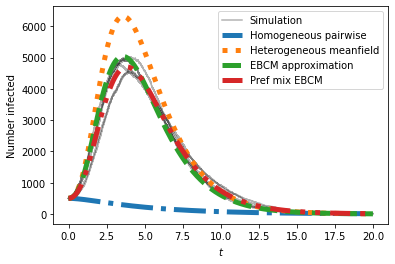

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import EoN

N=10**5
G=nx.barabasi_albert_graph(N, 5) #create a barabasi-albert graph

tmax = 20
iterations = 5  #run 5 simulations
tau = 0.1           #transmission rate
gamma = 1.0    #recovery rate
rho = 0.005      #random fraction initially infected

for counter in range(iterations): #run simulations
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

#Now compare with ODE predictions.  Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.

#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I, R = EoN.SIR_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

#meanfield models will generally overestimate SIR growth because they
#treat partnerships as constantly changing.
t, S, I, R = EoN.SIR_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

#The EBCM model does not account for degree correlations or clustering
t, S, I, R = EoN.EBCM_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '--', label = 'EBCM approximation', linewidth = 5)

#the preferential mixing model captures degree correlations.
t, S, I, R = EoN.EBCM_pref_mix_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, label = 'Pref mix EBCM', linewidth=5, dashes=[4, 2, 1, 2, 1, 2])

plt.xlabel('$t$')
plt.ylabel('Number infected')

plt.legend()
plt.savefig('SIR_BA_model_vs_sim.png')

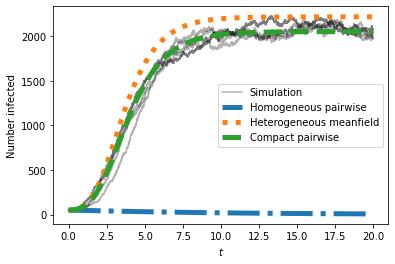

In [ ]:
plt.clf()

#Now run for SIS.   Simulation is much slower so need smaller network
N=10**4
G=nx.barabasi_albert_graph(N, 5) #create a barabasi-albert graph
for counter in range(iterations):
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

#Now compare with ODE predictions.  Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.

#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I = EoN.SIS_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

t, S, I = EoN.SIS_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

t, S, I = EoN.SIS_compact_pairwise_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, '--', label = 'Compact pairwise', linewidth = 5)

plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.savefig('SIS_BA_model_vs_sim.png')

In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 5.0 MB/s 


In [ ]:
!pip install cairocffi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 2.8 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=8830c3ead9aa52d879b11853c54f89731cd2138a5c9928aaa9fe0713bcf37aee
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [ ]:
#REDES COMPLEXAS
#YURI COUGO SANDY REIS
!pip install igraph

from igraph import *
import random
import math
import matplotlib.pylab as plt
import itertools


def analises(grafo,n):
	"analisa o grafo"
	print ("\n\nGrafo: ")
	print (grafo)
	print ("\nCoeficiente de Clustering: ")
	print (grafo.transitivity_undirected())
	print ("\nGrau max: ")
	print (grafo.maxdegree())
	print ("\nGrau medio: ")
	graus = grafo.degree()
	soma = 0
	menor = 10000
	for i in graus:
		soma = soma + i
		if i < menor: menor = i
	print (float(soma)/float(n))
	print ("\nGrau min: ")
	print (menor)
	arquivo = input("Entre com o nome do arquivo para saida da distribuicao de grau (sem extensao): ")
	print ("\nDistribuicao de grau: Impressa em imagem '"+arquivo+".png'")
#	plot(grafo.degree_distribution(bin_width=0.1),arquivo+".png")


def ErdosRenyi(n,p):
	"""gera um grafo modelo Erdos e Renyi (aleatorio)"""
	grafo = Graph()
	grafo.add_vertices(n)
	if (p >= 1): grafo = grafo.Full(n,False,False)
	elif ((p>0.0)and(p<1.0)):
		for aresta in itertools.permutations(range(n),2):
			if random.random() < p:
				grafo.add_edge(aresta[0],aresta[1])

	return grafo


def WattsStrogatz(k, n, p):
	"""gera um grafo modelo Watts-Strogratz (mundo pequeno)"""
	grafo = Graph()
	grafo.add_vertices(n)
	vertices = tuple(range(n))
	for i in range(1, k+1):
		alvos = vertices[i:] + vertices[0:i]
		for i in range(0, len(vertices)):
			grafo.add_edge(vertices[i],alvos[i])

	arestas = grafo.get_edgelist()
	for i in arestas:
		if random.random() < p:
			novoVertice = random.choice(vertices)
			grafo.delete_edges([i])
			grafo.add_edge(i[0],novoVertice)

	return grafo


def BarabasiAlbert(n,m):
	"""gera um grafo modelo Barabasi-Albert (rede sem escala)"""
	grafo = Graph()
	grafo.add_vertices(m)
	vertice = m-1
	vertices = list(range(0,m))
	probabilidade = []
	while (n > vertice):
		for v in vertices:
			grafo.add_edge(vertice, v)
		probabilidade = probabilidade + [vertice for i in xrange(m)] + vertices
		vertices = []
		vertices = [probabilidade[i] for i in sorted(random.sample(xrange(len(probabilidade)), m))]
		vertice = vertice + 1
		grafo.add_vertex()

	return grafo



opcao = ''
while (opcao != '4'):
	print ("\n\nGerar Grafo: \n1 - Erdos e Renyi \n2 - Watts-Strogatz \n3 - Barabasi-Albert\n4 - Sair")
	opcao = input("Opcao: ")
	if(opcao == '1'):
		n = int(input("Valor de n: "))
		p = float(input("Valor de p: "))
		analises(ErdosRenyi(n,p),n)
	elif(opcao == '2'):
		k = int(input("Valor de k: "))
		n = int(input("Valor de n: "))
		p = float(input("Valor de p: "))
		analises(WattsStrogatz(k,n,p),n)
	elif(opcao == '3'):
		n = int(input("Valor de n: "))
		m = int(input("Valor de m: "))
		analises(BarabasiAlbert(n,m),n)
	elif(opcao == '4'):
		print ("Programa Finalizado")
	else:
		print ("Opcao Invalida")







Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Gerar Grafo: 
1 - Erdos e Renyi 
2 - Watts-Strogatz 
3 - Barabasi-Albert
4 - Sair


Grafo: 
IGRAPH U--- 5 5 --
+ edges:
1--2 2--3 3--4 0--4 0--3

Coeficiente de Clustering: 
0.5

Grau max: 
3

Grau medio: 
2.0

Grau min: 
1

Distribuicao de grau: Impressa em imagem '1.png'


Gerar Grafo: 
1 - Erdos e Renyi 
2 - Watts-Strogatz 
3 - Barabasi-Albert
4 - Sair


In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib.animation import FuncAnimation

g=nx.watts_strogatz_graph(n=100, k=4, p=0.6)
gamma = 0.2
beta = 1.2
r_0 = beta/gamma
print(r_0)

import random
E = g.number_of_edges()

N = 100 # population size
I0 = 1   # intial n° of infected individuals
R0 = 0
S0 = N - I0 -R0
pos = nx.spring_layout(g)
w = [random.random() for i in range(E)]
s = max(w)
w = [ i/s for i in w ] #normalizing
len(w)
k = 0
for i, j in g.edges():
    g[i][j]['weight'] = w[k]
    k+=1

edgewidth = [d['weight'] for (u,v,d) in g.edges(data=True)]

nx_kwargs = {"with_labels":True, "pos": pos, "width": edgewidth, "alpha": 0.7} #optional arguments to be passed on to the
#networkx plotting command.
print("doing Gillespie simulation")
sim = EoN.Gillespie_SIR(g, tau = beta, gamma=gamma, rho = I0/N, transmission_weight="weight", return_full_data=True)
print("done with simulation, now plotting")
for i in range(0,5,1):
   # sim.display(time = i,  **nx_kwargs)
    plt.axis('off')
    plt.title("Iteration {}".format(i))
    plt.draw()
  # layout
pos = nx.spring_layout(g, iterations=50)
pos = nx.spring_layout(g)
labels = {}
for i in range(100):
    labels[i] = i
# rendering
plt.figure(figsize=(40,40))
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos, width=edgewidth, node_size=500)
nx.draw_networkx_labels(g, pos, labels)
plt.axis('off')